<a href="https://colab.research.google.com/github/zakiyyah-ai/Risk-Credit-Analyst/blob/main/Risk_Credit_Competition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import metrics

In [2]:
df_train = pd.read_csv('/content/train.csv')
df_test = pd.read_csv('/content/test.csv')
df_train.head()

,customer_id,customer_bod,gender,phone_flag,student,employment,credit_card,balance,income,tenure,default
0,8300,1993-08-17,Female,1.0,No,Self Employed,1.0,87104.12,5015120.75,4yrs 4mon,0
1,672,2007-12-17,Female,1.0,Yes,NaN,0.0,89236.34,2266076.58,4yrs 1mon,0
2,5670,2000-02-05,Female,1.0,Yes,NaN,0.0,171553.12,1779347.34,0yrs 9mon,0
3,2975,1999-11-16,Female,1.0,Yes,NaN,0.0,85979.04,2014246.24,1yrs 8mon,0
4,3883,1977-08-18,Male,1.0,No,Salaried,0.0,48874.77,5445148.31,0yrs 10mon,0


Data exploratory

In [3]:
df_train.shape

(3693, 11)

In [4]:
print(df_train.info())
df_train.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3693 entries, 0 to 3692
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   customer_id   3693 non-null   int64  
 1   customer_bod  3693 non-null   object 
 2   gender        3385 non-null   object 
 3   phone_flag    3693 non-null   float64
 4   student       3693 non-null   object 
 5   employment    2701 non-null   object 
 6   credit_card   3682 non-null   float64
 7   balance       3693 non-null   float64
 8   income        3693 non-null   float64
 9   tenure        3693 non-null   object 
 10  default       3693 non-null   int64  
dtypes: float64(4), int64(2), object(5)
memory usage: 317.5+ KB
None


customer_id     3693
customer_bod    2940
gender             2
phone_flag         2
student            2
employment         2
credit_card        2
balance         3509
income          3693
tenure            70
default            2
dtype: int64

In [5]:
df_train.isnull().sum()

customer_id       0
customer_bod      0
gender          308
phone_flag        0
student           0
employment      992
credit_card      11
balance           0
income            0
tenure            0
default           0
dtype: int64

In [6]:
#Replace Missing Value
mode_train_gender = df_train['gender'].mode()[0]
mode_train_employment = df_train['employment'].mode()[0]
mode_train_credit_card = df_train['credit_card'].mode()[0]
df_train['gender'] = df_train['gender'].fillna(mode_train_gender)
df_train['employment'] = df_train['employment'].fillna(mode_train_employment)
df_train['credit_card'] = df_train['credit_card'].fillna(mode_train_credit_card)
df_train.isnull().sum()

customer_id     0
customer_bod    0
gender          0
phone_flag      0
student         0
employment      0
credit_card     0
balance         0
income          0
tenure          0
default         0
dtype: int64

In [7]:
mode_test_gender = df_test['gender'].mode()[0]
mode_test_employment = df_test['employment'].mode()[0]
mode_test_credit_card = df_test['credit_card'].mode()[0]
df_test['gender'] = df_test['gender'].fillna(mode_test_gender)
df_test['employment'] = df_test['employment'].fillna(mode_test_employment)
df_test['credit_card'] = df_test['credit_card'].fillna(mode_test_credit_card)
df_test = df_test.dropna(axis=0)
df_test.isnull().sum()

customer_id     0
customer_bod    0
gender          0
phone_flag      0
student         0
employment      0
credit_card     0
balance         0
income          0
tenure          0
dtype: int64

In [8]:
#change customer_bod to age
df_train['customer_bod'] = pd.to_datetime(df_train['customer_bod'])
today = pd.to_datetime('today')
df_train['customer_bod'] = today.year - df_train['customer_bod'].dt.year
df_train = df_train.rename(columns={'customer_bod': 'age'})
df_train.head()

,customer_id,age,gender,phone_flag,student,employment,credit_card,balance,income,tenure,default
0,8300,28,Female,1.0,No,Self Employed,1.0,87104.12,5015120.75,4yrs 4mon,0
1,672,14,Female,1.0,Yes,Salaried,0.0,89236.34,2266076.58,4yrs 1mon,0
2,5670,21,Female,1.0,Yes,Salaried,0.0,171553.12,1779347.34,0yrs 9mon,0
3,2975,22,Female,1.0,Yes,Salaried,0.0,85979.04,2014246.24,1yrs 8mon,0
4,3883,44,Male,1.0,No,Salaried,0.0,48874.77,5445148.31,0yrs 10mon,0


In [9]:
df_test['customer_bod'] = pd.to_datetime(df_test['customer_bod'])
today = pd.to_datetime('today')
df_test['customer_bod'] = today.year - df_test['customer_bod'].dt.year
df_test = df_test.rename(columns={'customer_bod': 'age'})
df_test.head()

,customer_id,age,gender,phone_flag,student,employment,credit_card,balance,income,tenure
0,9365,22,Male,0.0,No,Salaried,1.0,0.00,4430744.15,0yrs 0mon
1,999,34,Female,0.0,No,Salaried,0.0,67431.40,3743149.53,0yrs 7mon
2,2835,21,Male,1.0,No,Salaried,1.0,69128.28,4821579.61,1yrs 11mon
3,5821,27,Male,1.0,No,Salaried,0.0,151051.78,3159764.69,0yrs 10mon
4,2330,25,Male,0.0,No,Self Employed,0.0,92727.85,5659353.20,1yrs 3mon


In [10]:
# Create dummy variables, contain 0 or 1 as a result of one hot encoding depending on whether value is True
df_train['gender'] = df_train['gender'].map({'Female':0, 'Male':1})
df_train['student'] = df_train['student'].map({'Yes':0, 'No':1})
df_train['employment'] = df_train['employment'].map({'Self Employed':0, 'Salaried':1})
df_train.head()

,customer_id,age,gender,phone_flag,student,employment,credit_card,balance,income,tenure,default
0,8300,28,0,1.0,1,0,1.0,87104.12,5015120.75,4yrs 4mon,0
1,672,14,0,1.0,0,1,0.0,89236.34,2266076.58,4yrs 1mon,0
2,5670,21,0,1.0,0,1,0.0,171553.12,1779347.34,0yrs 9mon,0
3,2975,22,0,1.0,0,1,0.0,85979.04,2014246.24,1yrs 8mon,0
4,3883,44,1,1.0,1,1,0.0,48874.77,5445148.31,0yrs 10mon,0


In [11]:
df_test['gender'] = df_test['gender'].map({'Female':0, 'Male':1})
df_test['student'] = df_test['student'].map({'Yes':0, 'No':1})
df_test['employment'] = df_test['employment'].map({'Self Employed':0, 'Salaried':1})
df_test.head()

,customer_id,age,gender,phone_flag,student,employment,credit_card,balance,income,tenure
0,9365,22,1,0.0,1,1,1.0,0.00,4430744.15,0yrs 0mon
1,999,34,0,0.0,1,1,0.0,67431.40,3743149.53,0yrs 7mon
2,2835,21,1,1.0,1,1,1.0,69128.28,4821579.61,1yrs 11mon
3,5821,27,1,1.0,1,1,0.0,151051.78,3159764.69,0yrs 10mon
4,2330,25,1,0.0,1,0,0.0,92727.85,5659353.20,1yrs 3mon


In [12]:
#calculate tenure in months
df_train_= df_train.tenure.str.extractall('(\d+)').unstack()
df_train_.columns = df_train_.columns.droplevel(0)
df_train['tenure'] = df_train_.iloc[:,0].astype(int).mul(12) + df_train_.iloc[:,1].astype(int)
df_train.head()

,customer_id,age,gender,phone_flag,student,employment,credit_card,balance,income,tenure,default
0,8300,28,0,1.0,1,0,1.0,87104.12,5015120.75,52,0
1,672,14,0,1.0,0,1,0.0,89236.34,2266076.58,49,0
2,5670,21,0,1.0,0,1,0.0,171553.12,1779347.34,9,0
3,2975,22,0,1.0,0,1,0.0,85979.04,2014246.24,20,0
4,3883,44,1,1.0,1,1,0.0,48874.77,5445148.31,10,0


In [13]:
df_test_= df_test.tenure.str.extractall('(\d+)').unstack()
df_test_.columns = df_test_.columns.droplevel(0)
df_test['tenure'] = df_test_.iloc[:,0].astype(int).mul(12) + df_test_.iloc[:,1].astype(int)
df_test.head()

,customer_id,age,gender,phone_flag,student,employment,credit_card,balance,income,tenure
0,9365,22,1,0.0,1,1,1.0,0.00,4430744.15,0
1,999,34,0,0.0,1,1,0.0,67431.40,3743149.53,7
2,2835,21,1,1.0,1,1,1.0,69128.28,4821579.61,23
3,5821,27,1,1.0,1,1,0.0,151051.78,3159764.69,10
4,2330,25,1,0.0,1,0,0.0,92727.85,5659353.20,15


Data visualizatoin

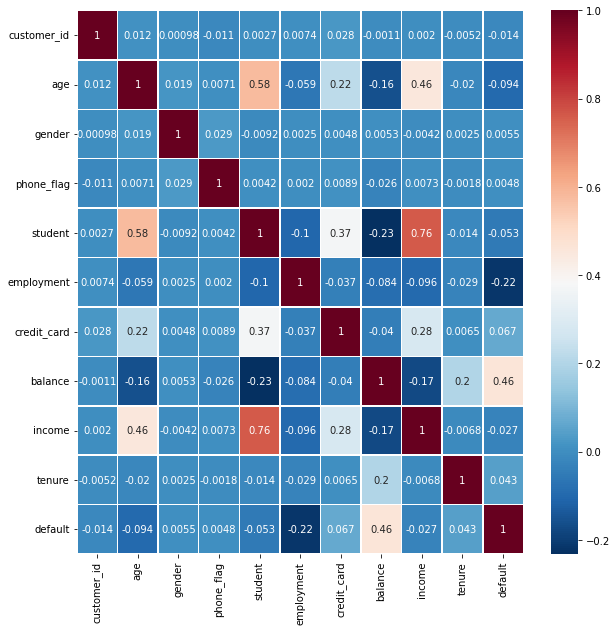

In [14]:
pearsoncorr = df_train.corr(method='pearson')
fig, ax = plt.subplots(figsize = (7,5))
fig.set_size_inches(10,10)
sns.heatmap(pearsoncorr, 
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

In [15]:
## Correlation Values of all the Features
## Top 10 Values
print (pearsoncorr['default'].sort_values(ascending=False)[:10], '\n')

## Last 5 Values
print (pearsoncorr['default'].sort_values(ascending=False)[-5:])

default        1.000000
balance        0.464955
credit_card    0.066617
tenure         0.042820
gender         0.005470
phone_flag     0.004842
customer_id   -0.014393
income        -0.027114
student       -0.053355
age           -0.094180
Name: default, dtype: float64 

customer_id   -0.014393
income        -0.027114
student       -0.053355
age           -0.094180
employment    -0.216726
Name: default, dtype: float64


In [16]:
df_cek = df_train[['gender','credit_card','balance','income','tenure','default']]
df_cek_test = df_test[['gender','credit_card','balance','income','tenure']]

In [17]:
y_trains = df_cek['default']
X_trains = df_cek.drop(columns='default')

In [18]:
# split data
X_train, X_test, y_train, y_test = train_test_split(X_trains, y_trains, test_size=0.33, random_state=42)

Creating models with data train

1. k-NN

In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [20]:
y_pred = neigh.predict(X_test)
print(classification_report(y_test, y_pred))
print('accuracy score: ',accuracy_score(y_test,y_pred))

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
print('auc score: ',metrics.auc(fpr, tpr))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96      1138
           1       0.49      0.30      0.37        81

    accuracy                           0.93      1219
   macro avg       0.72      0.64      0.67      1219
weighted avg       0.92      0.93      0.92      1219

accuracy score:  0.9327317473338802
auc score:  0.6371639653713468


2. SVM

In [21]:
from sklearn import svm

clf = svm.SVC(gamma=0.001)
clf.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [22]:
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
print('accuracy score: ',accuracy_score(y_test,y_pred))

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
print('auc score: ',metrics.auc(fpr, tpr))

              precision    recall  f1-score   support

           0       0.93      1.00      0.97      1138
           1       0.00      0.00      0.00        81

    accuracy                           0.93      1219
   macro avg       0.47      0.50      0.48      1219
weighted avg       0.87      0.93      0.90      1219

accuracy score:  0.933552091878589
auc score:  0.5


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


3. Decision Tree

In [23]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [24]:
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
print('accuracy score: ',accuracy_score(y_test,y_pred))

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
print('auc score: ',metrics.auc(fpr, tpr))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1138
           1       0.45      0.47      0.46        81

    accuracy                           0.93      1219
   macro avg       0.70      0.71      0.71      1219
weighted avg       0.93      0.93      0.93      1219

accuracy score:  0.92616899097621
auc score:  0.7139176376141813


4. Multinomioal Naive Bayes

In [25]:
from sklearn.naive_bayes import MultinomialNB

naive_bayes = MultinomialNB()
naive_bayes.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [26]:
y_pred = naive_bayes.predict(X_test)
print(classification_report(y_test, y_pred))
print('accuracy score: ',accuracy_score(y_test,y_pred))

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
print('auc score: ',metrics.auc(fpr, tpr))

              precision    recall  f1-score   support

           0       0.97      0.71      0.82      1138
           1       0.16      0.74      0.26        81

    accuracy                           0.72      1219
   macro avg       0.57      0.73      0.54      1219
weighted avg       0.92      0.72      0.79      1219

accuracy score:  0.7153404429860541
auc score:  0.7271366269608799


5. Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial')
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [30]:
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
print('accuracy score: ',accuracy_score(y_test,y_pred))

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
print('auc score: ',metrics.auc(fpr, tpr))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97      1138
           1       0.46      0.07      0.13        81

    accuracy                           0.93      1219
   macro avg       0.70      0.53      0.55      1219
weighted avg       0.91      0.93      0.91      1219

accuracy score:  0.9327317473338802
auc score:  0.5339614658595326


6. Random Forest

In [31]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0)
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [32]:
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
print('accuracy score: ',accuracy_score(y_test,y_pred))

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
print('auc score: ',metrics.auc(fpr, tpr))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1138
           1       0.76      0.36      0.49        81

    accuracy                           0.95      1219
   macro avg       0.86      0.68      0.73      1219
weighted avg       0.94      0.95      0.94      1219

accuracy score:  0.9499589827727646
auc score:  0.6750580398793639


7. Extra Trees

In [33]:
from sklearn.ensemble import ExtraTreesClassifier

clf = ExtraTreesClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0)
clf.fit(X_train, y_train)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
                     oob_score=False, random_state=0, verbose=0,
                     warm_start=False)

In [34]:
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
print('accuracy score: ',accuracy_score(y_test,y_pred))

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
print('auc score: ',metrics.auc(fpr, tpr))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1138
           1       0.63      0.33      0.44        81

    accuracy                           0.94      1219
   macro avg       0.79      0.66      0.70      1219
weighted avg       0.93      0.94      0.93      1219

accuracy score:  0.9425758818703855
auc score:  0.6596367896895137


Dikarenakan hasil paling bagus dari compare model adalah Decision Tree dengan auc 0.713, maka model tersebut akan dilakukan tuning paramter pada parameter max_depth

In [53]:
for i in [4,8,12]:
    clf = DecisionTreeClassifier(max_depth=i, random_state=0)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(classification_report(y_test, y_pred))
    print('accuracy score dengan max_depth = ',i,' : ',accuracy_score(y_test,y_pred))

    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
    print('auc score dengan max_depth = ',i,' : ',metrics.auc(fpr, tpr))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1138
           1       0.88      0.36      0.51        81

    accuracy                           0.95      1219
   macro avg       0.92      0.68      0.74      1219
weighted avg       0.95      0.95      0.94      1219

accuracy score dengan max_depth =  4  :  0.9540607054963085
auc score dengan max_depth =  4  :  0.6772548764347242
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1138
           1       0.61      0.46      0.52        81

    accuracy                           0.94      1219
   macro avg       0.78      0.72      0.75      1219
weighted avg       0.94      0.94      0.94      1219

accuracy score dengan max_depth =  8  :  0.9442165709598032
auc score dengan max_depth =  8  :  0.7178502462626657
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1138
       

Dengan dilakukan tuning pada max_depth, maka didapat max_depth 12 dengan auc 0.72

Hasil klasifikasi

Dari hasil uji evaluasi, disimpulkan bahawa metode Decision Tree memiliki auc score paling tinggi, yaitu sebanyak 0.768. Maka dari itu, dilakukan pemodelan untuk memprediksi datatest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=15, max_depth=None, min_samples_split=15, random_state=0)
clf.fit(X_trains, y_trains)

In [ ]:
y_pred = clf.predict(df_cek_test)

In [ ]:
df_test['default'] = pd.Series(y_pred)

In [ ]:
df_test['default'].value_counts()

In [ ]:
df_test.head()

In [ ]:
df_test_final =  df_test[['customer_id','default']]

In [ ]:
df_test_final.head()

In [ ]:
df_test_final.to_csv("Hasil Testing Risk Creedit.csv")